# Block Cipher

## Install Dependencies

In [21]:
import cv2
from matplotlib import pyplot as plt

In [5]:
# Install Imagemagick
!apt install -y imagemagick
!which convert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/bin/convert


In [13]:
# Install OpenSSL
!apt install -y openssl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be upgraded:
  openssl
1 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.
Need to get 1,184 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 openssl amd64 3.0.2-0ubuntu1.18 [1,184 kB]
Fetched 1,184 kB in 1s (1,605 kB/s)
(Reading database ... 125739 files and directories currently installed.)
Preparing to unpack .../openssl_3.0.2-0ubuntu1.18_amd64.deb ...
Unpacking openssl (3.0.2-0ubuntu1.18) over (3.0.2-0ubuntu1.12) ...
Setting up openssl (3.0.2-0ubuntu1.18) ...
Processing triggers for man-db (2.10.2-1) ...


In [16]:
!convert -version
!openssl version

Version: ImageMagick 6.9.11-60 Q16 x86_64 2021-01-25 https://imagemagick.org
Copyright: (C) 1999-2021 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP(4.5) 
Delegates (built-in): bzlib djvu fftw fontconfig freetype heic jbig jng jp2 jpeg lcms lqr ltdl lzma openexr pangocairo png tiff webp wmf x xml zlib
OpenSSL 3.0.2 15 Mar 2022 (Library: OpenSSL 3.0.2 15 Mar 2022)


## Import and Convert Images
The images that's being used is my Shiba Inu named Pony <3

In [7]:
# Convert image to size of 2000x2000 and pbm format
!convert pony.jpg -resize 2000x2000 pony.pbm

In [8]:
# View first few lines of .pbm
!head -4 pony.pbm

P4
1500 2000
���������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������

In [9]:
# Delete first two line from .pbm
!sed -i '1,2d' pony.pbm

In [10]:
# View first few lines of .pbm
!head -4 pony.pbm

����������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������

In [11]:
# Convert to binary .x
!cp pony.pbm pony.x

In [12]:
# View first few lines of .x
!head -4 pony.x

����������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������

## Encryption on PBM File

In [37]:
# Encrypt using OpenSSL with neither salt nor padding
# Using ECB
!openssl enc -aes-256-ecb -in pony.x -nosalt -K '7c07f68ea8494b2f8b9fea297119350d78708afa69c1c76' -out ecb.x

# Insert original header back
!cat header.txt ecb.x > ecb.pbm
!head -4 ecb.pbm

hex string is too short, padding with zero bytes to length
P4
1500 2000
Z�k����Ӛt~���
Z�k����nW�p�9���9��L��������


In [40]:
# Using CBC
!openssl enc -aes-256-cbc -in pony.x -nosalt -out cbc.x

# Insert original header back
!cat header.txt cbc.x > cbc.pbm
!head -4 cbc.pbm

enter AES-256-CBC encryption password:
Verifying - enter AES-256-CBC encryption password:
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
P4
1500 2000
e ���(���7�+{4�����~B$-�ڶ7�ܯ{���I��t+�J6��&X��+�[n J\�j΄��4g���>O��k ĵ��d2������N��^6
\����	\t�ڴ�^�o��a\�!@U���1�4me��XO�籾xU�E������(T�Н�1|�����_9˦�&�í�+�[D5���z�dޮk�z�D ��L"p��E�=P��	�K�2nӥ����=�0곸��ɽ����6pYt�͉��;6������c��ӬC��jBf��&CS�0z��B��S%Z;y��xvF�V�Mԗ"���O��Y�o���#0���o��o�wS�Q}=�g��/$�[%|J�?w"/�s��yh��f �g��L�r��cC��Z�~}H���a��M�o����תu�e���H�lW�`ТT���Ui


In [44]:
# Using CBC with IV
!openssl enc -aes-256-cbc -in pony.x -nosalt -K '7c07f68ea8494b2f8b9fea297119350d78708afa69c1c76' -iv 'FEDCBA987654321' -out cbc_iv.x

# Insert original header back
!cat header.txt cbc_iv.x > cbc_iv.pbm
!head -4 cbc_iv.pbm

hex string is too short, padding with zero bytes to length
hex string is too short, padding with zero bytes to length
P4
1500 2000
L���";��`���� k{�u��R���,��D�p�����QEU�x���Q3 0[�!�2�� ?_���FG�+L���i\���F�����l���
�`B�+��k�%��2�M_��рX;!Y5*/3+��!D�.;'��c�t&��r{������.x���X;@����y���`�6�h�w�5i��J����ȳ��y� r$�<�qY�y�&3{	��� �K�m>X*¡�ۙ���h?%���


## Compare Images

### Original

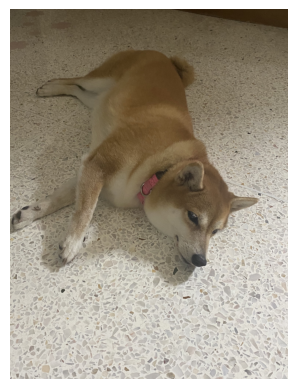

In [26]:
# View image using matplot
img = cv2.imread('pony.jpg',1)

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### ECB Encryption

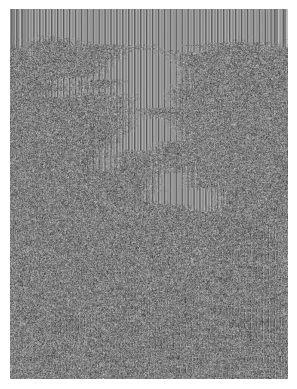

In [38]:
# Convert .pbm to .jpg
!convert ecb.pbm ecb.jpg

# Use cv2 to read .jpg
img = cv2.imread('ecb.jpg',1)

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### CBC Encryption

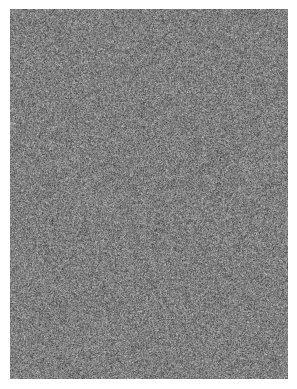

In [41]:
# Convert .pbm to .jpg
!convert cbc.pbm cbc.jpg

# Use cv2 to read .jpg
img = cv2.imread('cbc.jpg',1)

# Plot with matplot
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### CBC with IV Encryption

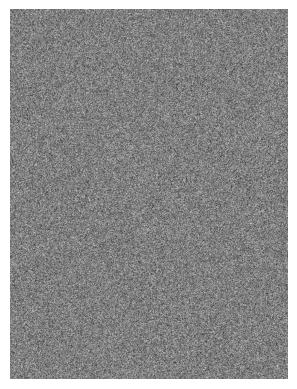

In [45]:
# Convert .pbm to .jpg
!convert cbc_iv.pbm cbc_iv.jpg

# Use cv2 to read .jpg
img = cv2.imread('cbc_iv.jpg',1)

# Plot with matplot
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()